## Estadística descriptiva 


In [4]:
## Se importan las librerías
import numpy as np
import pandas as pd 
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

#### Análisis descriptivo FIFA

In [6]:
##Leer el dataset
datos_fifa = pd.read_csv('fifa_datos.csv')
datos_fifa.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [9]:
## Informacion general del dataset
datos_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [10]:
## Descripcion de datos segun valores int64
datos_fifa.describe(include=['int64'])

,Unnamed: 0,ID,Age,Overall,Potential,Special
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000


In [11]:
## Descripcion de datos segun valores float64
datos_fifa.describe(include=['float64'])

,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [12]:
## Descripcion de datos segun valores object
datos_fifa.describe(include=[object])

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,...,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,...,16122,16122,16122,16122,16122,16122,16122,16122,16122,16643
unique,17194,18207,164,164,651,679,217,144,2,9,...,99,99,99,95,98,108,108,108,98,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€1.1M,€1K,Right,Medium/ Medium,...,62+2,62+2,62+2,61+2,61+2,63+2,63+2,63+2,61+2,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,...,660,660,660,713,669,634,634,634,669,557


<AxesSubplot:>

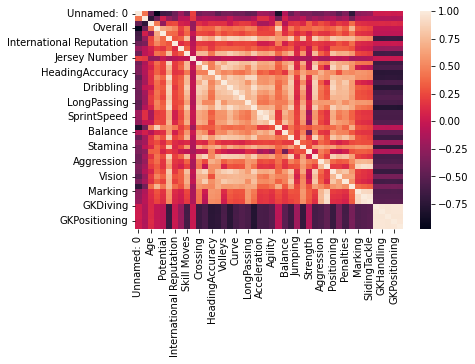

In [13]:
## Mapa de calor
sns.heatmap(datos_fifa.corr())

#### Análisis descriptivo Grupos Económicos Ecuador

In [16]:
datos_ge = pd.read_excel('Conformación de los Grupos Económicos y su Comportamiento Tributario (4).xlsx')
datos_ge.head(10)

,Ranking \n(1) Tamaño 2021,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*),No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
0,1,1.0,0.0,NaN,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",PARCIALMENTE,2.0,0.0,3.0,1.0,...,221893.35,3509949.0,3577970.0,1.894902e+10,1.792876e+10,3.688293e+09,3.699749e+09,588975950.0,667872172.0,NaN
1,2,2.0,0.0,NaN,"ALMACENES JUAN ELJURI (BANCO DEL AUSTRO, AEKIA...",PARCIALMENTE,45.0,42.0,17.0,19.0,...,4339679.14,796827.0,945874.0,6.417335e+09,6.436091e+09,1.878733e+09,1.955377e+09,127087663.0,190328750.0,NaN
2,3,3.0,0.0,NaN,"CORPORACIÓN FAVORITA (COMERCIAL KIWY, SUKASA, ...",PARCIALMENTE,4.0,5.0,20.0,3.0,...,1617777.87,0.0,0.0,3.448646e+09,3.343835e+09,2.427005e+09,2.314556e+09,144524011.0,139310219.0,NaN
3,4,5.0,1.0,NaN,"BANCO DE GUAYAQUIL (CORPORACION MULTIBG, FIDEI...",SI,2.0,0.0,9.0,0.0,...,86918.43,4785739.0,5678838.0,6.014463e+09,5.334073e+09,7.840423e+08,7.919991e+08,206200661.0,234359513.0,NaN
4,5,4.0,-1.0,NaN,SCHLUMBERGER DEL ECUADOR (CONSORCIO SHUSHUFIND...,NO,8.0,0.0,0.0,0.0,...,237591.28,0.0,0.0,3.286786e+09,3.616608e+09,2.426480e+09,2.305837e+09,202204211.0,152342627.0,NaN
5,6,6.0,0.0,NaN,"PRODUBANCO (SERVIPAGOS, PROTRAMITES TRAMITES P...",PARCIALMENTE,7.0,0.0,0.0,2.0,...,504808.17,1109933.0,1369521.0,5.677059e+09,5.337383e+09,5.541985e+08,5.711326e+08,233528010.0,299941053.0,NaN
6,7,7.0,0.0,NaN,"OCP ECUADOR (ANDES PETROLEUM, CONSORCIO B-16, ...",PARCIALMENTE,12.0,33.0,0.0,10.0,...,2621454.37,0.0,0.0,2.878285e+09,3.158582e+09,1.282071e+09,1.455499e+09,66287611.0,78336419.0,NaN
7,8,9.0,1.0,NaN,"BANCO BOLIVARIANO C.A. (SASETAF, DESINVEST)",SI,1.0,0.0,3.0,3.0,...,17093.67,9817255.0,7702248.0,4.241323e+09,3.828371e+09,5.978779e+08,5.712858e+08,193190178.0,209149340.0,NaN
8,9,8.0,-1.0,NaN,"CORPORACIÓN EL ROSADO (MI COMISARIATO, INMOBIL...",SI,15.0,0.0,3.0,4.0,...,1718472.22,2826.0,7789.0,1.942145e+09,1.837639e+09,4.569322e+08,4.766123e+08,73489379.0,73480134.0,NaN
9,10,11.0,1.0,NaN,BANCO INTERNACIONAL (FIDEICOMISO BANCO INTERNA...,SI,10.0,4.0,0.0,1.0,...,55.85,980730.0,781507.0,3.977631e+09,3.805740e+09,3.920152e+08,3.915141e+08,170429336.0,182165876.0,NaN


In [17]:
## Informacion general
datos_ge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 40 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Ranking 
(1) Tamaño  2021                                                                                     315 non-null    object 
 1   Ranking 
(1) Tamaño  2020                                                                                     302 non-null    float64
 2   Variación Ranking Tamaño 2020 - 2021                                                                          302 non-null    float64
 3   NUEVO
GE                                                                                                      50 non-null     object 
 4   
Nombre Grupo Económico                                 

In [19]:
## Descripcion de datos segun valores float64
datos_ge.describe(include=['float64'])

,Ranking \n(1) Tamaño 2020,Variación Ranking Tamaño 2020 - 2021,No. de Integrantes domiciliados en PARAÍSOS FISCALES\n(**),No. de Integrantes y Empresas Offshore relacionadas con el Grupo Económico publicados en PANAMÁ PAPERS (***),Personas \nNaturales (a),Personas \nExtranjeras (b),Sociedades \nNacionales (c),Sociedades \nExtranjeras (d),Contribuyentes\n Especiales,Grandes \nContribuyentes e \nImportancia \nRecaudatoria,...,Impuesto Causado ISD 2019,Impuesto Causado IAE 2020 (5),Impuesto Causado IAE 2019 (5),Total Activo \n(6) 2020,Total Activo \n(6) 2019,Total Patrimonio (7) 2020,Total Patrimonio \n(7) 2019,\nTotal Recaudado (8) 2020,\nTotal Recaudado (8) 2019,\nTotal Deuda Generada \n(9)
count,302.000000,302.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,1.0
mean,151.500000,0.000000,3.003300,2.613861,7.069307,2.217822,39.544554,11.062706,7.386139,2.435644,...,4.076260e+05,1.512046e+05,1.447792e+05,8.666017e+08,8.488488e+08,3.141654e+08,3.075412e+08,3.643370e+07,4.042244e+07,0.0
std,87.324109,14.639182,26.387898,23.125902,61.468550,19.462277,344.081334,96.641685,64.275685,21.195752,...,3.573969e+06,1.470556e+06,1.389845e+06,7.632850e+09,7.470386e+09,2.746678e+09,2.689186e+09,3.204688e+08,3.553322e+08,NaN
min,1.000000,-85.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,5.258247e+06,5.761201e+06,-2.462531e+07,-5.790622e+06,2.530000e+02,2.630000e+02,0.0
25%,76.250000,-5.750000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,...,4.785650e+02,0.000000e+00,0.000000e+00,6.283528e+07,6.591704e+07,2.529118e+07,2.371852e+07,1.698178e+06,2.069227e+06,0.0
50%,151.500000,1.000000,0.000000,0.000000,2.000000,0.000000,13.000000,2.000000,2.000000,1.000000,...,1.654349e+04,0.000000e+00,0.000000e+00,1.381787e+08,1.440114e+08,5.515283e+07,5.398364e+07,5.099821e+06,6.119566e+06,0.0
75%,226.750000,7.750000,1.000000,0.000000,5.000000,1.000000,24.000000,6.000000,4.000000,1.000000,...,1.156632e+05,0.000000e+00,0.000000e+00,3.574288e+08,3.574384e+08,1.513844e+08,1.499963e+08,1.143406e+07,1.489997e+07,0.0
max,302.000000,49.000000,455.000000,396.000000,1071.000000,336.000000,5991.000000,1676.000000,1119.000000,369.000000,...,6.175535e+07,2.290750e+07,2.193405e+07,1.312902e+11,1.286006e+11,4.759606e+10,4.659249e+10,5.519706e+09,6.124000e+09,0.0


In [21]:
## Descripcion de datos segun valores object
datos_ge.describe(include=[object])

,Ranking \n(1) Tamaño 2021,NUEVO\nGE,\nNombre Grupo Económico,Reporta sus BENEFICIARIOS EFECTIVOS \n(*)
count,315,50,304,303
unique,315,2,304,4
top,1,X,"BANCO PICHINCHA (DINERS CLUB DEL ECUADOR, BANC...",SI
freq,1,49,1,202


<AxesSubplot:>

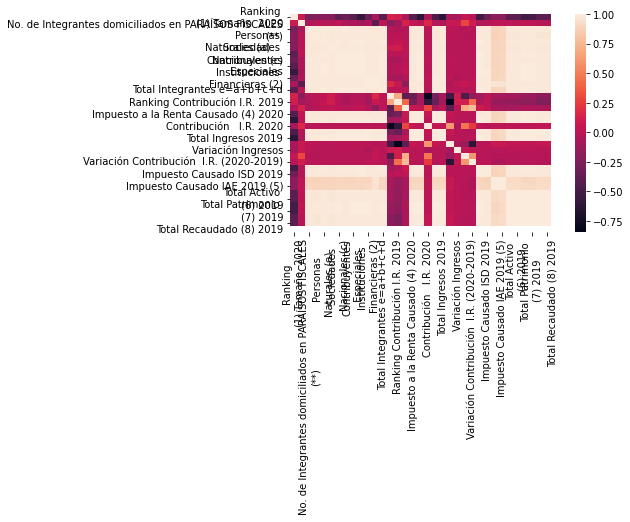

In [22]:
## Mapa de calor
sns.heatmap(datos_ge.corr())